In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

num_classes = 10

# normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# partition training set into training and validation set
val_X = X_train[40000:,:]
train_X = X_train[:40000,:]
val_y = y_train[40000:,:]
train_y = y_train[:40000,:]

170508288/170498071 [==============================] - 2s 0us/step


# Parameter Tunning

## Learning Rate

In [ ]:
# Define a convolutional neural network

model1 = Sequential()
model1.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model1.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model1.add(Flatten())
model1.add(Dense(10, activation = "softmax"))

model1.compile(loss='categorical_crossentropy',
               optimizer=Adam(learning_rate = 0.01),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model1 = ModelCheckpoint('best_model1.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history1 = model1.fit(train_X, train_y,
                      batch_size=256,
                      epochs=40,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model1])

Epoch 1/40
157/157 [==============================] - ETA: 0s - loss: 2.3054 - accuracy: 0.1000
Epoch 00001: val_accuracy improved from -inf to 0.09970, saving model to best_model1.h5
157/157 [==============================] - 30s 185ms/step - loss: 2.3054 - accuracy: 0.1000 - val_loss: 2.3033 - val_accuracy: 0.0997
Epoch 2/40
157/157 [==============================] - ETA: 0s - loss: 2.3032 - accuracy: 0.0995
Epoch 00002: val_accuracy did not improve from 0.09970
157/157 [==============================] - 27s 172ms/step - loss: 2.3032 - accuracy: 0.0995 - val_loss: 2.3031 - val_accuracy: 0.0977
Epoch 3/40
157/157 [==============================] - ETA: 0s - loss: 2.3032 - accuracy: 0.0984
Epoch 00003: val_accuracy did not improve from 0.09970
157/157 [==============================] - 25s 156ms/step - loss: 2.3032 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.0980
Epoch 4/40
157/157 [==============================] - ETA: 0s - loss: 2.3031 - accuracy: 0.0975
Epoch 00004: val

In [ ]:
# Define a convolutional neural network

model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model2.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model2.add(Flatten())
model2.add(Dense(10, activation = "softmax"))

model2.compile(loss='categorical_crossentropy',
               optimizer=Adam(learning_rate = 0.001),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model2 = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history2 = model2.fit(train_X, train_y,
                      batch_size=256,
                      epochs=40,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model2])

Epoch 1/40
156/157 [============================>.] - ETA: 0s - loss: 1.8568 - accuracy: 0.2942
Epoch 00001: val_accuracy improved from -inf to 0.40620, saving model to best_model2.h5
157/157 [==============================] - 15s 94ms/step - loss: 1.8564 - accuracy: 0.2944 - val_loss: 1.6127 - val_accuracy: 0.4062
Epoch 2/40
156/157 [============================>.] - ETA: 0s - loss: 1.5148 - accuracy: 0.4369
Epoch 00002: val_accuracy improved from 0.40620 to 0.49000, saving model to best_model2.h5
157/157 [==============================] - 14s 89ms/step - loss: 1.5147 - accuracy: 0.4369 - val_loss: 1.3843 - val_accuracy: 0.4900
Epoch 3/40
156/157 [============================>.] - ETA: 0s - loss: 1.3361 - accuracy: 0.5064
Epoch 00003: val_accuracy did not improve from 0.49000
157/157 [==============================] - 14s 88ms/step - loss: 1.3361 - accuracy: 0.5064 - val_loss: 1.4243 - val_accuracy: 0.4820
Epoch 4/40
156/157 [============================>.] - ETA: 0s - loss: 1.2099 - 

In [ ]:
# Define a convolutional neural network

model3 = Sequential()
model3.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model3.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model3.add(Flatten())
model3.add(Dense(10, activation = "softmax"))

model3.compile(loss='categorical_crossentropy',
               optimizer=Adam(learning_rate = 0.0001),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model3 = ModelCheckpoint('best_model3.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history3 = model3.fit(train_X, train_y,
                      batch_size=256,
                      epochs=40,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model3])

Epoch 1/40
156/157 [============================>.] - ETA: 0s - loss: 2.1457 - accuracy: 0.1961
Epoch 00001: val_accuracy improved from -inf to 0.26400, saving model to best_model3.h5
157/157 [==============================] - 15s 90ms/step - loss: 2.1456 - accuracy: 0.1961 - val_loss: 1.9608 - val_accuracy: 0.2640
Epoch 2/40
156/157 [============================>.] - ETA: 0s - loss: 1.8183 - accuracy: 0.3192
Epoch 00002: val_accuracy improved from 0.26400 to 0.34940, saving model to best_model3.h5
157/157 [==============================] - 14s 88ms/step - loss: 1.8180 - accuracy: 0.3193 - val_loss: 1.7390 - val_accuracy: 0.3494
Epoch 3/40
156/157 [============================>.] - ETA: 0s - loss: 1.7008 - accuracy: 0.3674
Epoch 00003: val_accuracy improved from 0.34940 to 0.38300, saving model to best_model3.h5
157/157 [==============================] - 14s 88ms/step - loss: 1.7005 - accuracy: 0.3674 - val_loss: 1.6632 - val_accuracy: 0.3830
Epoch 4/40
156/157 [=======================

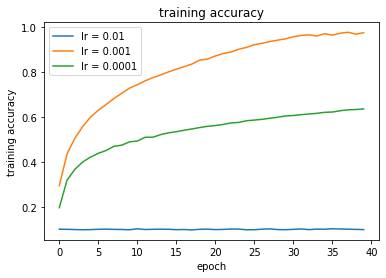

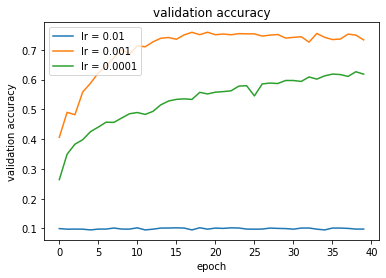

In [ ]:
# Plot training accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['lr = 0.01', 'lr = 0.001', 'lr = 0.0001'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['lr = 0.01', 'lr = 0.001', 'lr = 0.0001'], loc='upper left')
plt.show()

## Batch Size

In [ ]:
# Define a convolutional neural network

model1 = Sequential()
model1.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model1.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model1.add(Flatten())
model1.add(Dense(10, activation = "softmax"))

model1.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model1 = ModelCheckpoint('best_model1.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history1 = model1.fit(train_X, train_y,
                      batch_size=32,
                      epochs=40,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model1])

Epoch 1/40
1249/1250 [============================>.] - ETA: 0s - loss: 1.6986 - accuracy: 0.3676
Epoch 00001: val_accuracy improved from -inf to 0.49620, saving model to best_model1.h5
1250/1250 [==============================] - 29s 23ms/step - loss: 1.6983 - accuracy: 0.3677 - val_loss: 1.3737 - val_accuracy: 0.4962
Epoch 2/40
1248/1250 [============================>.] - ETA: 0s - loss: 1.2425 - accuracy: 0.5489
Epoch 00002: val_accuracy improved from 0.49620 to 0.57070, saving model to best_model1.h5
1250/1250 [==============================] - 28s 22ms/step - loss: 1.2426 - accuracy: 0.5488 - val_loss: 1.1817 - val_accuracy: 0.5707
Epoch 3/40
1249/1250 [============================>.] - ETA: 0s - loss: 1.0174 - accuracy: 0.6362
Epoch 00003: val_accuracy improved from 0.57070 to 0.65840, saving model to best_model1.h5
1250/1250 [==============================] - 27s 22ms/step - loss: 1.0175 - accuracy: 0.6363 - val_loss: 0.9637 - val_accuracy: 0.6584
Epoch 4/40
1249/1250 [=========

In [ ]:
# Define a convolutional neural network

model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model2.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model2.add(Flatten())
model2.add(Dense(10, activation = "softmax"))

model2.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model2 = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history2 = model2.fit(train_X, train_y,
                      batch_size=64,
                      epochs=40,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model2])

Epoch 1/40
625/625 [==============================] - ETA: 0s - loss: 1.7230 - accuracy: 0.3519
Epoch 00001: val_accuracy improved from -inf to 0.46540, saving model to best_model2.h5
625/625 [==============================] - 21s 33ms/step - loss: 1.7230 - accuracy: 0.3519 - val_loss: 1.4375 - val_accuracy: 0.4654
Epoch 2/40
625/625 [==============================] - ETA: 0s - loss: 1.2844 - accuracy: 0.5337
Epoch 00002: val_accuracy improved from 0.46540 to 0.58430, saving model to best_model2.h5
625/625 [==============================] - 21s 33ms/step - loss: 1.2844 - accuracy: 0.5337 - val_loss: 1.1627 - val_accuracy: 0.5843
Epoch 3/40
625/625 [==============================] - ETA: 0s - loss: 1.0751 - accuracy: 0.6162
Epoch 00003: val_accuracy improved from 0.58430 to 0.63750, saving model to best_model2.h5
625/625 [==============================] - 21s 34ms/step - loss: 1.0751 - accuracy: 0.6162 - val_loss: 1.0204 - val_accuracy: 0.6375
Epoch 4/40
625/625 [=======================

In [ ]:
# Define a convolutional neural network

model3 = Sequential()
model3.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model3.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model3.add(Flatten())
model3.add(Dense(10, activation = "softmax"))

model3.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model3 = ModelCheckpoint('best_model3.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history3 = model3.fit(train_X, train_y,
                      batch_size=128,
                      epochs=40,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model3])

Epoch 1/40
156/157 [============================>.] - ETA: 0s - loss: 2.1457 - accuracy: 0.1961
Epoch 00001: val_accuracy improved from -inf to 0.26400, saving model to best_model3.h5
157/157 [==============================] - 15s 90ms/step - loss: 2.1456 - accuracy: 0.1961 - val_loss: 1.9608 - val_accuracy: 0.2640
Epoch 2/40
156/157 [============================>.] - ETA: 0s - loss: 1.8183 - accuracy: 0.3192
Epoch 00002: val_accuracy improved from 0.26400 to 0.34940, saving model to best_model3.h5
157/157 [==============================] - 14s 88ms/step - loss: 1.8180 - accuracy: 0.3193 - val_loss: 1.7390 - val_accuracy: 0.3494
Epoch 3/40
156/157 [============================>.] - ETA: 0s - loss: 1.7008 - accuracy: 0.3674
Epoch 00003: val_accuracy improved from 0.34940 to 0.38300, saving model to best_model3.h5
157/157 [==============================] - 14s 88ms/step - loss: 1.7005 - accuracy: 0.3674 - val_loss: 1.6632 - val_accuracy: 0.3830
Epoch 4/40
156/157 [=======================

In [ ]:
# Define a convolutional neural network

model4 = Sequential()
model4.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model4.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model4.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model4.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model4.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model4.add(Flatten())
model4.add(Dense(10, activation = "softmax"))

model4.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model4 = ModelCheckpoint('best_model4.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history4 = model4.fit(train_X, train_y,
                      batch_size=256,
                      epochs=40,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model4])

Epoch 1/40
156/157 [============================>.] - ETA: 0s - loss: 1.8932 - accuracy: 0.2795
Epoch 00001: val_accuracy improved from -inf to 0.38430, saving model to best_model4.h5
157/157 [==============================] - 14s 88ms/step - loss: 1.8926 - accuracy: 0.2798 - val_loss: 1.6355 - val_accuracy: 0.3843
Epoch 2/40
156/157 [============================>.] - ETA: 0s - loss: 1.5323 - accuracy: 0.4288
Epoch 00002: val_accuracy improved from 0.38430 to 0.40480, saving model to best_model4.h5
157/157 [==============================] - 14s 87ms/step - loss: 1.5324 - accuracy: 0.4289 - val_loss: 1.6977 - val_accuracy: 0.4048
Epoch 3/40
156/157 [============================>.] - ETA: 0s - loss: 1.3757 - accuracy: 0.4914
Epoch 00003: val_accuracy improved from 0.40480 to 0.48560, saving model to best_model4.h5
157/157 [==============================] - 14s 87ms/step - loss: 1.3754 - accuracy: 0.4916 - val_loss: 1.4568 - val_accuracy: 0.4856
Epoch 4/40
156/157 [=======================

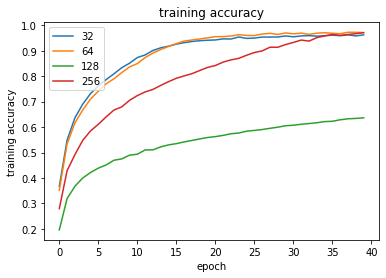

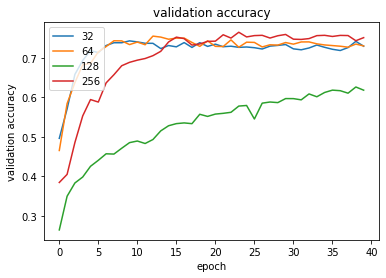

In [ ]:
# Plot training accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['32', '64', '128', '256'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['32', '64', '128', '256'], loc='upper left')
plt.show()

## Epochs

In [ ]:
# Define a convolutional neural network

model1 = Sequential()
model1.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model1.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model1.add(Flatten())
model1.add(Dense(10, activation = "softmax"))

model1.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model1 = ModelCheckpoint('best_model1.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history1 = model1.fit(train_X, train_y,
                      batch_size=256,
                      epochs=20,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model1])

Epoch 1/20
156/157 [============================>.] - ETA: 0s - loss: 1.8581 - accuracy: 0.3050
Epoch 00001: val_accuracy improved from -inf to 0.39420, saving model to best_model1.h5
157/157 [==============================] - 15s 89ms/step - loss: 1.8575 - accuracy: 0.3053 - val_loss: 1.6247 - val_accuracy: 0.3942
Epoch 2/20
156/157 [============================>.] - ETA: 0s - loss: 1.4751 - accuracy: 0.4526
Epoch 00002: val_accuracy improved from 0.39420 to 0.48510, saving model to best_model1.h5
157/157 [==============================] - 13s 81ms/step - loss: 1.4750 - accuracy: 0.4527 - val_loss: 1.4120 - val_accuracy: 0.4851
Epoch 3/20
156/157 [============================>.] - ETA: 0s - loss: 1.3104 - accuracy: 0.5229
Epoch 00003: val_accuracy improved from 0.48510 to 0.54110, saving model to best_model1.h5
157/157 [==============================] - 13s 83ms/step - loss: 1.3104 - accuracy: 0.5228 - val_loss: 1.2453 - val_accuracy: 0.5411
Epoch 4/20
156/157 [=======================

In [ ]:
# Define a convolutional neural network

model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model2.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model2.add(Flatten())
model2.add(Dense(10, activation = "softmax"))

model2.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model2 = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history2 = model2.fit(train_X, train_y,
                      batch_size=256,
                      epochs=40,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model2])

Epoch 1/40
156/157 [============================>.] - ETA: 0s - loss: 1.8908 - accuracy: 0.2821
Epoch 00001: val_accuracy improved from -inf to 0.35420, saving model to best_model2.h5
157/157 [==============================] - 14s 86ms/step - loss: 1.8907 - accuracy: 0.2820 - val_loss: 1.6992 - val_accuracy: 0.3542
Epoch 2/40
156/157 [============================>.] - ETA: 0s - loss: 1.5381 - accuracy: 0.4266
Epoch 00002: val_accuracy improved from 0.35420 to 0.45170, saving model to best_model2.h5
157/157 [==============================] - 14s 87ms/step - loss: 1.5377 - accuracy: 0.4268 - val_loss: 1.5331 - val_accuracy: 0.4517
Epoch 3/40
156/157 [============================>.] - ETA: 0s - loss: 1.3529 - accuracy: 0.5028
Epoch 00003: val_accuracy improved from 0.45170 to 0.50880, saving model to best_model2.h5
157/157 [==============================] - 14s 89ms/step - loss: 1.3526 - accuracy: 0.5030 - val_loss: 1.3410 - val_accuracy: 0.5088
Epoch 4/40
156/157 [=======================

In [ ]:
# Define a convolutional neural network

model3 = Sequential()
model3.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model3.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model3.add(Flatten())
model3.add(Dense(10, activation = "softmax"))

model3.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model3 = ModelCheckpoint('best_model3.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history3 = model3.fit(train_X, train_y,
                      batch_size=128,
                      epochs=100,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model3])

Epoch 1/100
313/313 [==============================] - ETA: 0s - loss: 1.7825 - accuracy: 0.3289
Epoch 00001: val_accuracy improved from -inf to 0.43100, saving model to best_model3.h5
313/313 [==============================] - 15s 45ms/step - loss: 1.7825 - accuracy: 0.3289 - val_loss: 1.5573 - val_accuracy: 0.4310
Epoch 2/100
313/313 [==============================] - ETA: 0s - loss: 1.3689 - accuracy: 0.4993
Epoch 00002: val_accuracy improved from 0.43100 to 0.53950, saving model to best_model3.h5
313/313 [==============================] - 14s 45ms/step - loss: 1.3689 - accuracy: 0.4993 - val_loss: 1.2547 - val_accuracy: 0.5395
Epoch 3/100
313/313 [==============================] - ETA: 0s - loss: 1.1573 - accuracy: 0.5805
Epoch 00003: val_accuracy improved from 0.53950 to 0.57360, saving model to best_model3.h5
313/313 [==============================] - 14s 44ms/step - loss: 1.1573 - accuracy: 0.5805 - val_loss: 1.1769 - val_accuracy: 0.5736
Epoch 4/100
312/313 [===================

In [ ]:
# Define a convolutional neural network

model4 = Sequential()
model4.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model4.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model4.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model4.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model4.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model4.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model4.add(Flatten())
model4.add(Dense(10, activation = "softmax"))

model4.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model4 = ModelCheckpoint('best_model4.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history4 = model4.fit(train_X, train_y,
                      batch_size=256,
                      epochs=200,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model4])

Epoch 1/200
156/157 [============================>.] - ETA: 0s - loss: 1.8502 - accuracy: 0.3056
Epoch 00001: val_accuracy improved from -inf to 0.41840, saving model to best_model4.h5
157/157 [==============================] - 14s 82ms/step - loss: 1.8498 - accuracy: 0.3058 - val_loss: 1.5589 - val_accuracy: 0.4184
Epoch 2/200
156/157 [============================>.] - ETA: 0s - loss: 1.4684 - accuracy: 0.4600
Epoch 00002: val_accuracy improved from 0.41840 to 0.48290, saving model to best_model4.h5
157/157 [==============================] - 13s 80ms/step - loss: 1.4683 - accuracy: 0.4600 - val_loss: 1.4375 - val_accuracy: 0.4829
Epoch 3/200
156/157 [============================>.] - ETA: 0s - loss: 1.3090 - accuracy: 0.5267
Epoch 00003: val_accuracy improved from 0.48290 to 0.54350, saving model to best_model4.h5
157/157 [==============================] - 13s 81ms/step - loss: 1.3084 - accuracy: 0.5269 - val_loss: 1.2707 - val_accuracy: 0.5435
Epoch 4/200
156/157 [===================

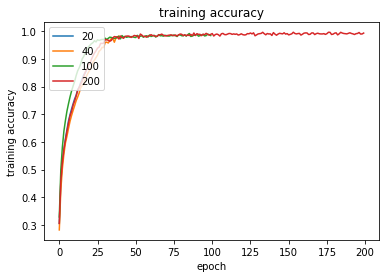

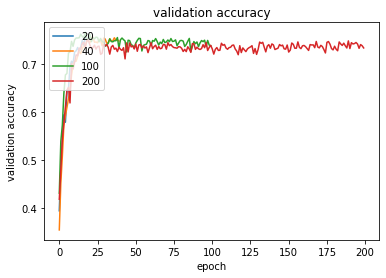

In [ ]:
# Plot training accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['20', '40', '100', '200'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['20', '40', '100', '200'], loc='upper left')
plt.show()

# With Data Augumentation

In [ ]:
# Define a convolutional neural network

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
#model.add(Activation('relu'))

model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(AveragePooling2D(strides=(4, 4), padding = "same"))

model.add(Flatten())

model.add(Dense(10, activation = "softmax"))
#model.add(Activation('softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                    

Using real-time data augmentation.
Epoch 1/60
624/625 [============================>.] - ETA: 0s - loss: 1.8097 - accuracy: 0.3208
Epoch 00001: val_accuracy improved from -inf to 0.45190, saving model to best_model.h5
625/625 [==============================] - 27s 42ms/step - loss: 1.8093 - accuracy: 0.3209 - val_loss: 1.4918 - val_accuracy: 0.4519
Epoch 2/60
625/625 [==============================] - ETA: 0s - loss: 1.4174 - accuracy: 0.4793
Epoch 00002: val_accuracy improved from 0.45190 to 0.54600, saving model to best_model.h5
625/625 [==============================] - 26s 41ms/step - loss: 1.4174 - accuracy: 0.4793 - val_loss: 1.2461 - val_accuracy: 0.5460
Epoch 3/60
625/625 [==============================] - ETA: 0s - loss: 1.2323 - accuracy: 0.5578
Epoch 00003: val_accuracy improved from 0.54600 to 0.55160, saving model to best_model.h5
625/625 [==============================] - 26s 42ms/step - loss: 1.2323 - accuracy: 0.5578 - val_loss: 1.3059 - val_accuracy: 0.5516
Epoch 4/60


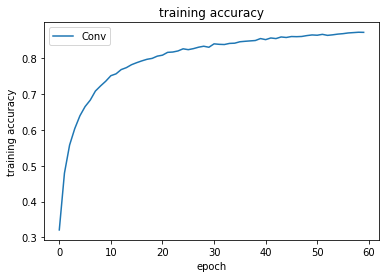

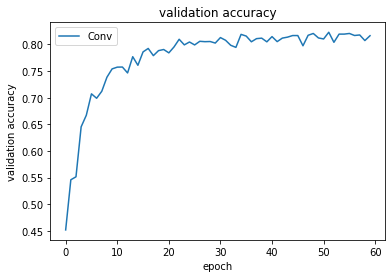

313/313 [==============================] - 2s 6ms/step - loss: 0.5753 - accuracy: 0.8207
Test accuracy: 0.8206999897956848


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False  # randomly flip images
    )

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
it_train = datagen.flow(train_X, train_y, batch_size = 64)

steps = int(train_X.shape[0] / 64)

# Fit the model on the batches generated by datagen.flow().
history = model.fit(it_train, 
                    steps_per_epoch=steps, 
                    epochs=60, 
                    validation_data=(val_X, val_y), 
                    verbose=1, 
                    callbacks=[save_best_model])

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', scores[1])

# Activations

In [ ]:
extractor = Model(inputs=model.inputs, outputs=[layer.output for layer in model.layers])
activations = extractor(X_train)

In [ ]:
example = extractor.predict(np.expand_dims(X_train[0], axis = 0))
#activations = extractor.predict(X_train) # Returns a list of five Numpy arrays: one array per layer activation

The Example Image


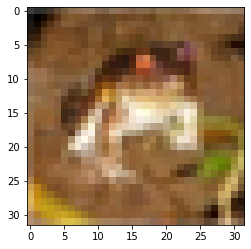

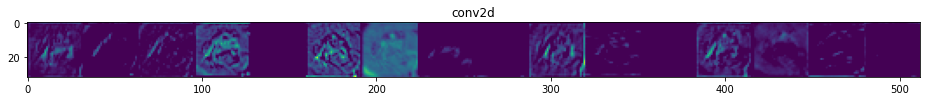

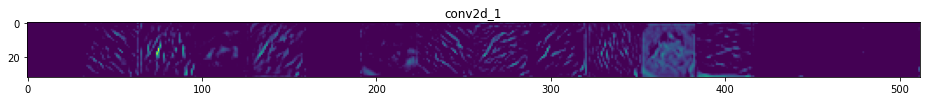

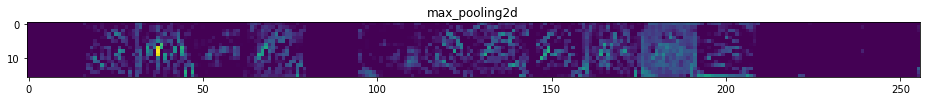

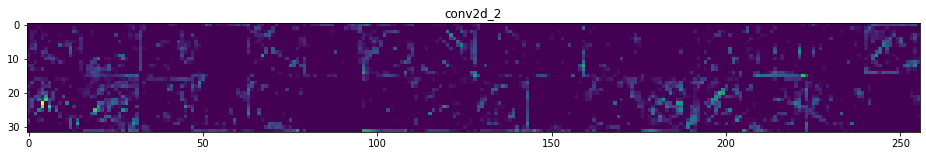

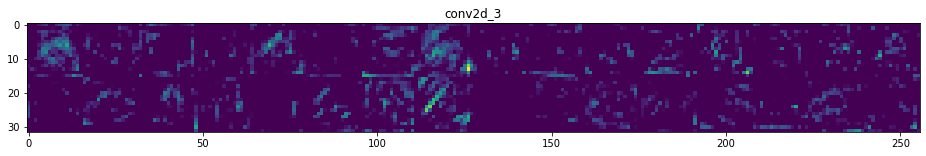

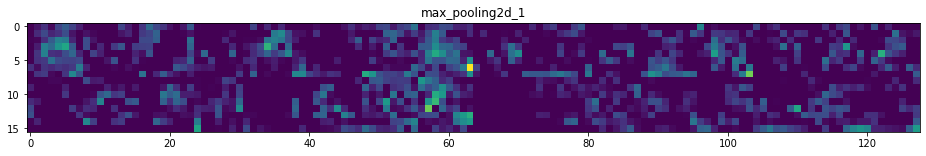

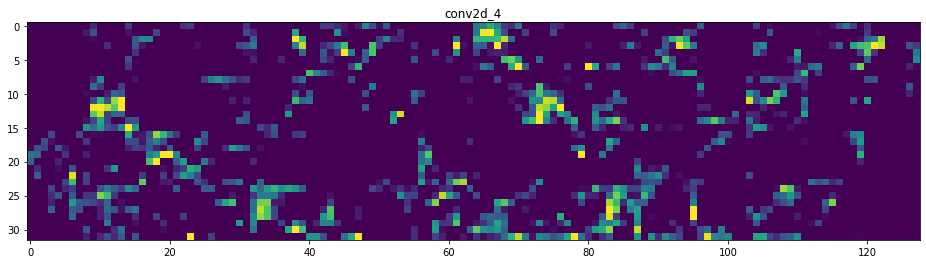

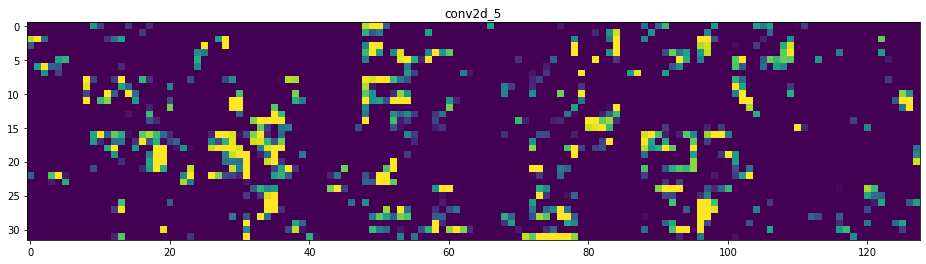

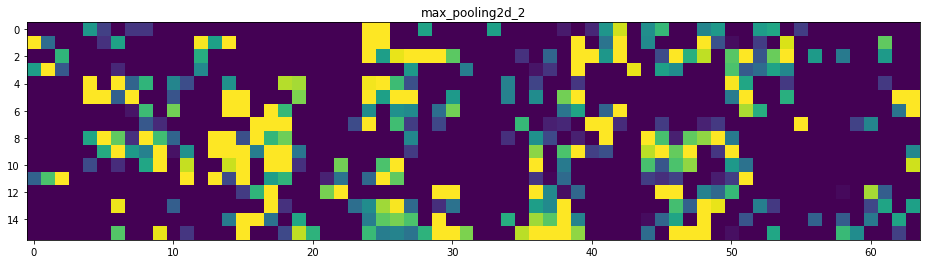

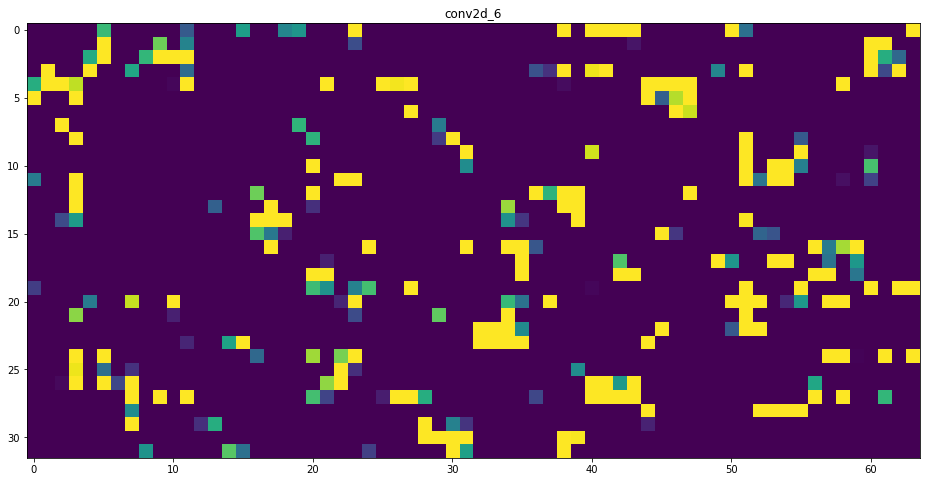

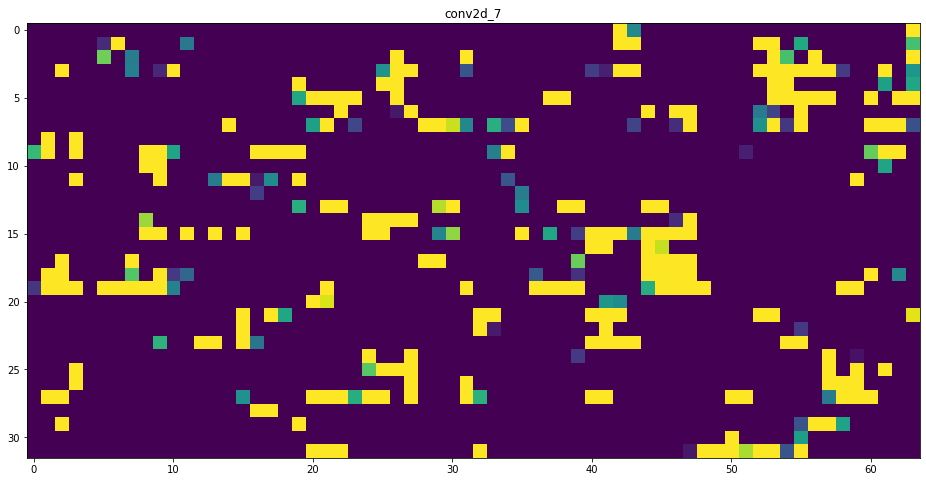

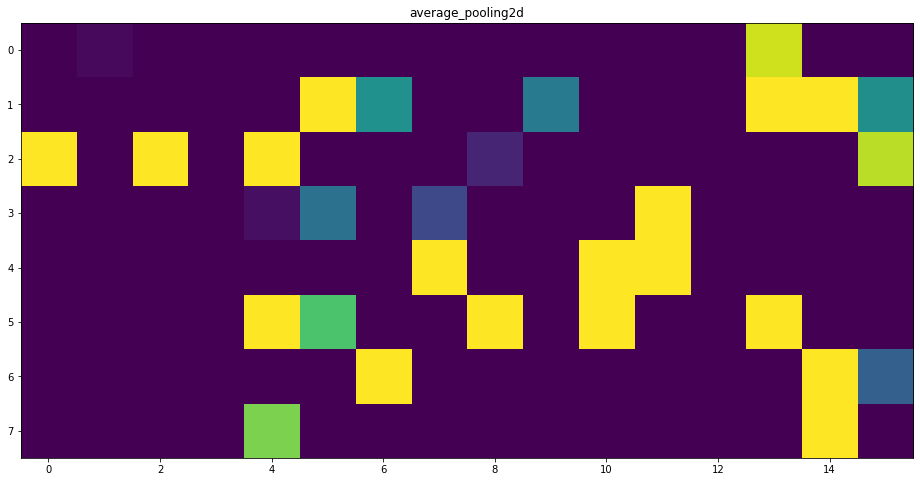

In [ ]:
print("The Example Image")
# plot raw pixel data
plt.imshow(X_train[0])
# show the figure
plt.show()

layer_names = []
for layer in model.layers:
  layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in list(zip(layer_names, example))[:12]: # Displays the feature maps
  n_features = layer_activation.shape[-1] # Number of features in the feature map
  size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
  n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols): # Tiles each filter into a big horizontal grid
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      #print(type(channel_image))
      #channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
      #channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
      display_grid[col * size : (col + 1) * size, # Displays the grid
                   row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

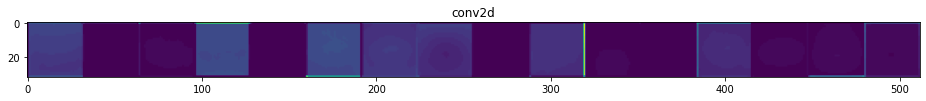

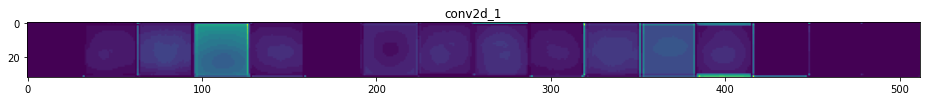

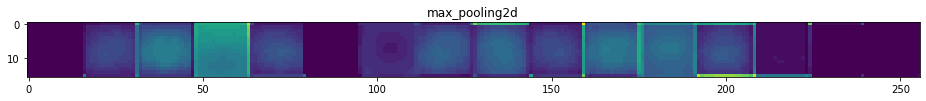

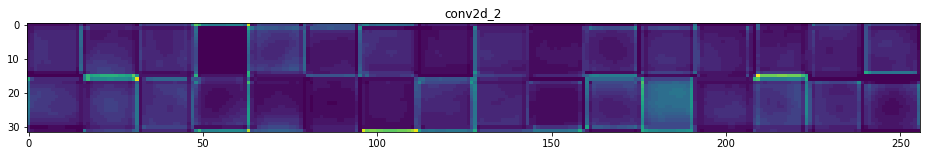

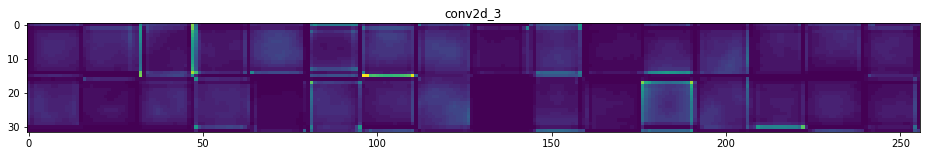

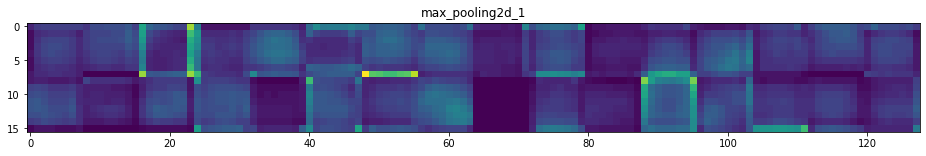

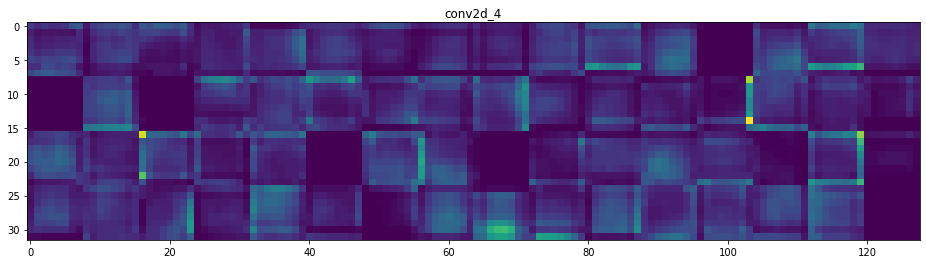

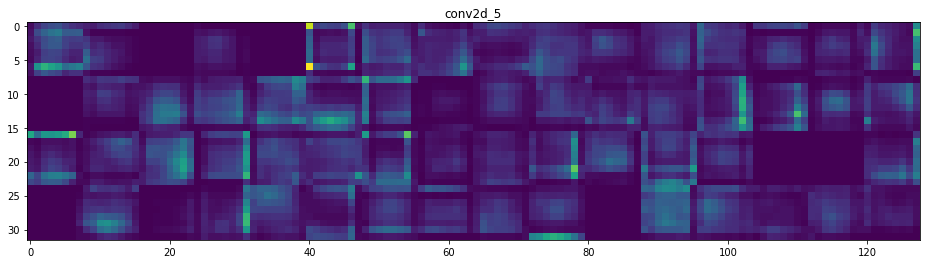

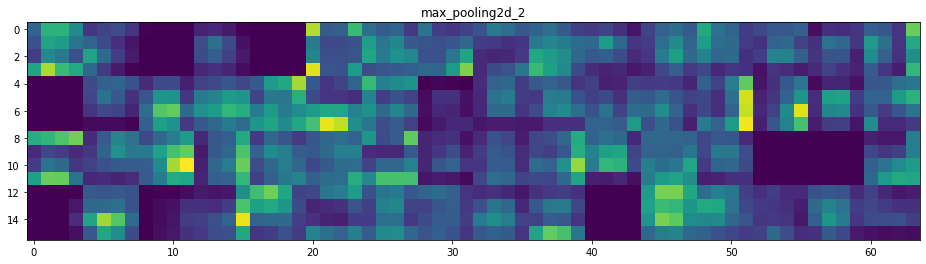

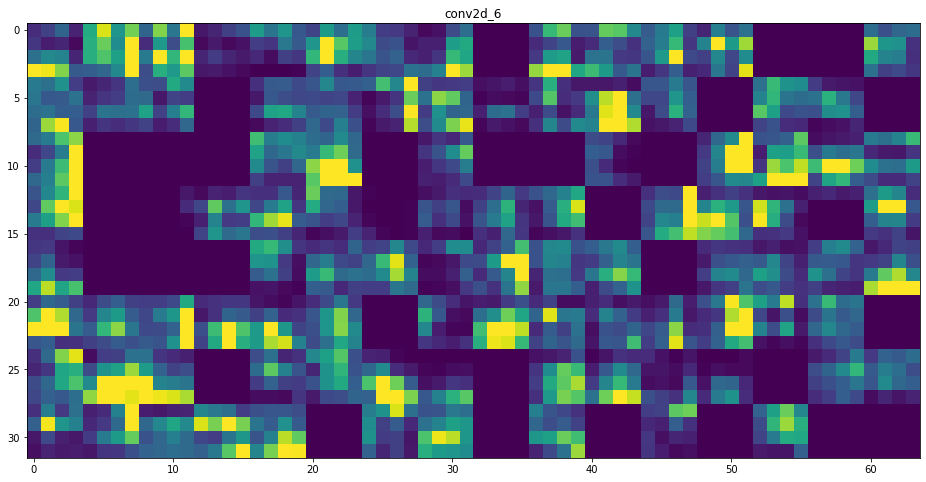

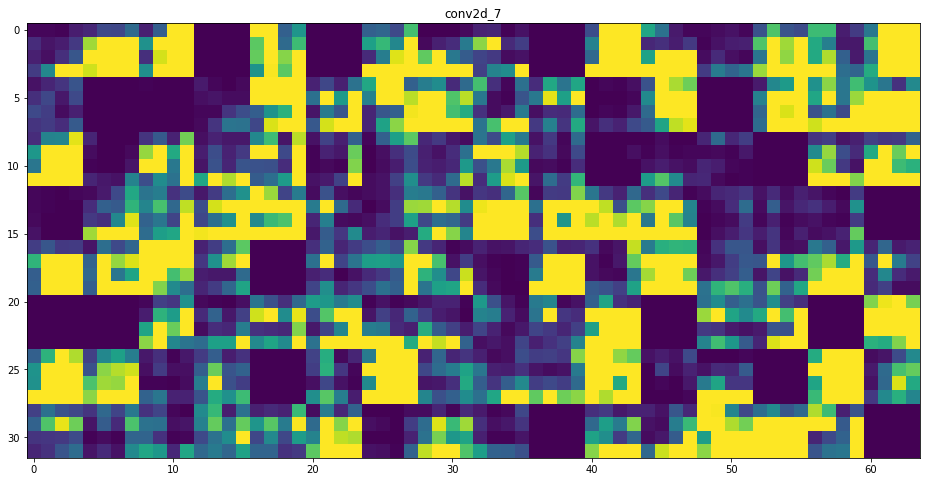

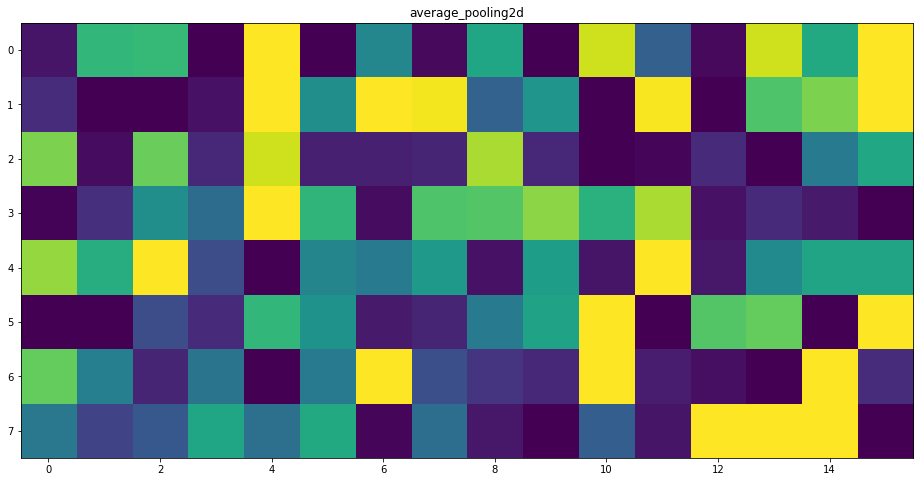

In [ ]:
layer_names = []
for layer in model.layers:
  layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in list(zip(layer_names, activations))[:12]: # Displays the feature maps
  layer_activation = layer_activation.numpy()
  layer_activation = np.expand_dims(np.mean(layer_activation, axis = 0), axis = 0)
  n_features = layer_activation.shape[-1] # Number of features in the feature map
  size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
  n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols): # Tiles each filter into a big horizontal grid
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      #print(type(channel_image))
      #channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
      #channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
      display_grid[col * size : (col + 1) * size, # Displays the grid
                   row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
weight = []

for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    weights = weights[0] if len(weights) > 1 else weights
    weight.append(np.absolute(np.sum(weights)))

In [ ]:
layer_names = []
for layer in model.layers:
  layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

abs_avgs = []
for act in activations:
  abs_avgs.append(np.average(np.absolute(act.numpy().flatten())))
df = pd.DataFrame(list(zip(layer_names, weight, abs_avgs)), columns = ['Layers', 'Average Absolute Values of Weights', 'Average Absolute Values of Activations'])

In [ ]:
scaler = MinMaxScaler()
df["Normalized Average Absolute Values of Activations"] = scaler.fit_transform(df["Average Absolute Values of Activations"].values.reshape(-1, 1))
df

,Layers,Average Absolute Values of Weights,Average Absolute Values of Activations,Normalized Average Absolute Values of Activations
0,conv2d,9.737999,0.057458,0.007587
1,conv2d_1,41.646465,0.048232,0.000000
2,max_pooling2d,0.000000,0.096697,0.039854
3,conv2d_2,78.374420,0.086272,0.031281
4,conv2d_3,268.389618,0.088633,0.033223
5,max_pooling2d_1,0.000000,0.197698,0.122908
6,conv2d_4,484.296783,0.234770,0.153392
7,conv2d_5,1298.837646,0.221029,0.142093
8,max_pooling2d_2,0.000000,0.595410,0.449952
9,conv2d_6,2034.145996,0.628204,0.476919


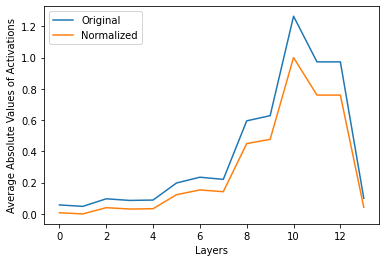

In [ ]:
# plt.plot(df.index, 'Average Absolute Values of Weights', data = df)
plt.plot(df.index, 'Average Absolute Values of Activations', data = df)
plt.plot(df.index, 'Normalized Average Absolute Values of Activations', data = df)
plt.ylabel('Average Absolute Values of Activations')
plt.xlabel('Layers')
plt.legend(['Original', 'Normalized'], loc='upper left')
plt.show()